In [1]:
"""
Created on Wed Feb 28 15:26:56 2018

@author: swick
"""

# NOTE: discrete has not been tested for cases where you choose more/less elements than colors

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import nclcmaps as ncm
from matplotlib.colors import to_rgba_array

# Define a function to plot example color maps
def plotColorMap(cmap):
    
    # Initialize a figure and subplot for the color map
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111)
    
    # Create a 10 by 10 box to sample the colors in the map
    im = ax.pcolor(np.arange(100).reshape(10,10), cmap=cmap)
    
    # create an axes on the right side of ax for an example color bar. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    plt.colorbar(im, cax=cax)
    plt.show()

Let's look at some examples of how to use this library. Most of the functions will require
the name of the NCL color table that you want to use. These can be found here:
https://www.ncl.ucar.edu/Document/Graphics/color_table_gallery.shtml

The simplest function in this library is cmap(), which will simply make a color map of the
requested NCL color table in forward or reverse order

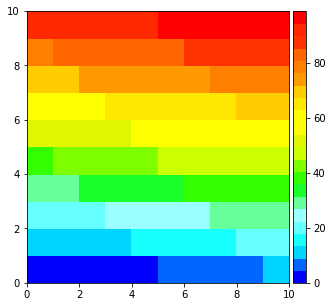

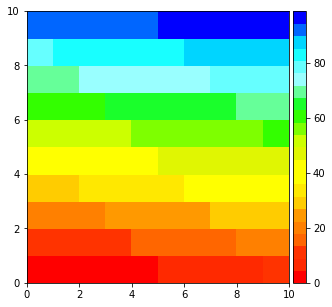

In [2]:
cmapExample = ncm.cmap("gui_default")
plotColorMap(cmapExample)
cmapExample = ncm.cmap("gui_default", reverse=True)
plotColorMap(cmapExample)

The cmapRange() function allows the user to select a range of values from an NCL color table

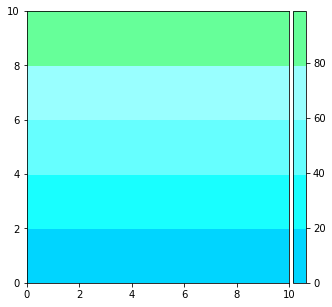

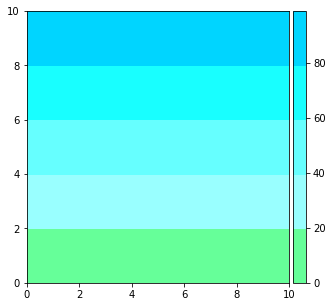

In [3]:
cmapExample = ncm.cmapRange("gui_default", start=4, finish=9)
plotColorMap(cmapExample)
cmapExample = ncm.cmapRange("gui_default", start=4, finish=9, reverse=True)
plotColorMap(cmapExample)

If we only want to use chunks of a color table, we can specify each desired color by referring to the index of that color in the NCL color table. To do this, we will list the elements and pass that list to the function cmapDiscrete(). Click on a color table from the previous link to view the indexes of each color:
https://www.ncl.ucar.edu/Document/Graphics/ColorTables/amwg256.shtml

This function needs the name of the color table as well as a list of the indices that you want to use.

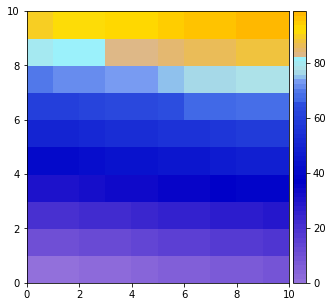

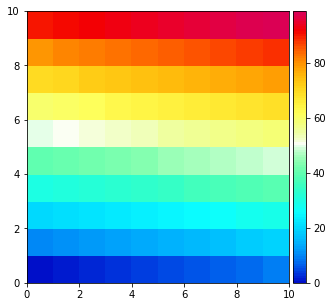

In [4]:
elements = list(range(2,42))+[48,50,54,62,68,77,86,93,100,108]+[146,150,154,158,162,166,170,174,178,182]
cmapExample = ncm.cmapDiscrete("amwg256", elements)
plotColorMap(cmapExample)

elements = list(range(18,235,2))+[235]
cmapExample = ncm.cmapDiscrete("NCV_jaisnd", elements)
plotColorMap(cmapExample)

Let's take it one step further. Say you want to combine discrete elements of multiple color tables. There is a function for that as well, but since multiple color tables will be used a list of their names will be passed as the first argument instead of a string.

[[65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56], [93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,

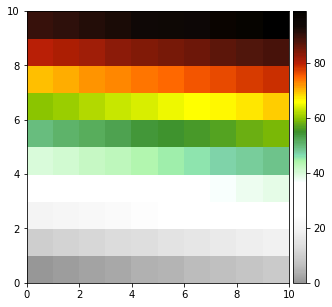

In [5]:
# VORTICITY COLOR BAR
tempElementsGreys = list(range(65, 1, -1)) + [2] * 30
tempElementsGMT = list(range(81, 55, -1))
tempElementsNiceSecond = list(range(93, 226))
tempelements = []
tempelements.append(tempElementsGreys)
tempelements.append(tempElementsGMT)
tempelements.append(tempElementsNiceSecond)
names = ["MPL_Greys", "GMT_relief_oceanonly", "nice_gfdl"]
cmapExample = ncm.cmapMulti(names, tempelements)

plotColorMap(cmapExample)

That was quite a few lines to create that color map. Using it again by copying all those lines of code might look ugly in another notebook. Luckily, that isn't necessary. Each of the functions we have used has two optional parameters: save and newName.

save is a boolean telling the function if you want to save the color map you created. newName is a string for the desired name of your new color map. If a name isn't given, the new color map will be called newcmap.

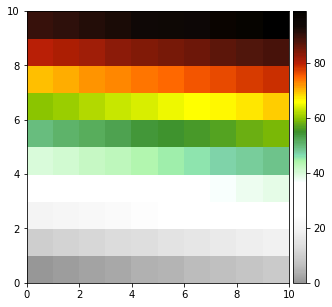

In [6]:
# VORTICITY COLOR BAR
tempElementsGreys = list(range(65, 1, -1)) + [2] * 30
tempElementsGMT = list(range(81, 55, -1))
tempElementsNiceSecond = list(range(93, 226))
tempelements = []
tempelements.append(tempElementsGreys)
tempelements.append(tempElementsGMT)
tempelements.append(tempElementsNiceSecond)
names = ["MPL_Greys", "GMT_relief_oceanonly", "nice_gfdl"]
cmapExample = ncm.cmapMulti(names, tempelements, save=True, newName="vorticity")

plotColorMap(cmapExample)

New color maps are kept in the customMaps directory within the nclcmaps directory. They are stored as comma-separated value (csv) files, so they include the .csv extension.

Great! Now we don't have to rewrite these lines of code when we want to use this color map! But how do we retrieve the color map? With the load() function! The only parameter needed is the name given to the custom color map (without the .csv extension).

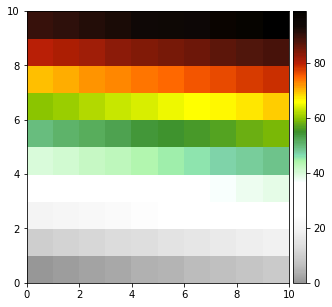

In [7]:
myMap = ncm.load("vorticity")
plotColorMap(myMap)

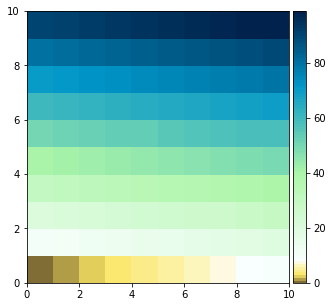

In [8]:
# TEMPERATURE COLOR BAR
elements_BuPu = list(range(129, 1, -1))
elements_Blues = list(range(2, 130))
elements_GnBu = list(range(129, 48, -1))
elements_BuGn = list(range(48, 130))
elements_OLLS = list(range(4, 50))
elements_hres = list(range(25, 255))
cmapelements = []
cmapelements.append(elements_BuPu)
cmapelements.append(elements_Blues)
cmapelements.append(elements_GnBu)
cmapelements.append(elements_BuGn)
cmapelements.append(elements_OLLS)
cmapelements.append(elements_hres)
names = ["MPL_BuPu", "MPL_Blues", "MPL_GnBu", "MPL_BuGn", "OceanLakeLandSnow", "hotres"]

cmap_Temp = ncm.cmapMulti(names, cmapelements, save=True, newName="t850")



#Pwat
elements = list(range(140, 260, 15)) + list(range(129, 38, -1))
cmap_Temp = ncm.cmapDiscrete("GMT_relief", elements)
#cmap_Temp = ncm.cmapRange("MPL_gist_earth", 2, 95, True)

plotColorMap(cmap_Temp)